<a href="https://colab.research.google.com/github/fultramari/Analise-Saresp/blob/main/Saresp_Analise_De_Dados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
E# from sys import displayhook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

tabela = pd.read_csv("planilha.csv.csv")

#Declarando dataframes que utilizaremos
faltas = tabela.loc[tabela["REALIZOU O EXAME (S=1, N=0)"] == 0]
presentes = tabela.loc[tabela["REALIZOU O EXAME (S=1, N=0)"] == 1]
terceirao = presentes.loc[presentes["SERIE/ANO"] == "EM-3ª série"]
nono = presentes.loc[presentes["SERIE/ANO"] == "9º Ano EF"]

#Quem não foi: Onde mais moravam?

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Interior"].shape  #25.977 faltas

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana da Baixada Santista"].shape #5523 faltas

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de Campinas"].shape #3191 faltas

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de Ribeirão Preto"].shape # 4704 faltas

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de São Paulo"].shape #53107 faltas

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de Sorocaba"].shape #6182 faltas

faltas[faltas["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana do Vale do Paraíba e Litoral Norte"].shape #6139 faltas





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(6139, 9)

In [ ]:
#Qual localidade teve melhor desempenho? (em média)

#SAO PAULO: 178.659 alunos
sp = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de São Paulo"]
sp.describe() #Desempenho médio : Os alunos da cidade de SP tiveram aproveitamentento médio de 58,7%, média de 14 acertos e desvio padrão de 22% (5 acertos)

#Status geral:
sp[sp["STATUS"] == "Abaixo do Básico"] #45.856 paulistas (25,67%)

sp[sp["STATUS"] == "Básico"] #77.599 paulistas(43,43%)

sp[sp["STATUS"] == "Adequado"] #45.480 paulistas(25,46%)

sp[sp["STATUS"] == "Avançado"] #9724 paulistas(5,44%)




In [ ]:
sp.describe()

,"REALIZOU O EXAME (S=1, N=0)",ACERTOS (Total de questões: 24),PORCENTAGEM DE ACERTOS
count,178659.0,178659.000000,178659.000000
mean,1.0,14.090121,58.708721
std,0.0,5.352006,22.299676
min,1.0,0.000000,0.000000
25%,1.0,10.000000,41.700000
50%,1.0,14.000000,58.300000
75%,1.0,18.000000,75.000000
max,1.0,24.000000,100.000000


Text(0.5, 1.0, 'São Paulo - acertos por número de alunos')

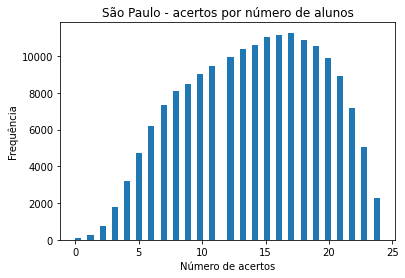

In [ ]:
#Percentual de desenvolvimento
plt.hist(sp['ACERTOS (Total de questões: 24)'],bins=50)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("São Paulo - acertos por número de alunos")

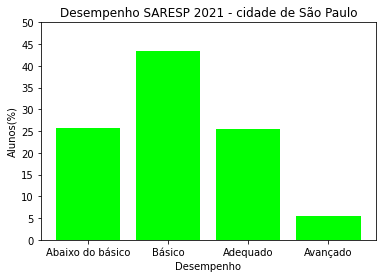

In [ ]:
alunos = [25.67 , 43.43 , 25.46, 5.44] #valores de Y
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos, color="lime")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - cidade de São Paulo")
plt.show()

In [ ]:
# INTERIOR DE SÃO PAULO (89.234 pessoas)
#Desempenho médio:
interior = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Interior"]
media = sum(interior ["PORCENTAGEM DE ACERTOS"])/ len(interior)
interior.describe() #Desempenho médio : 56,6% de acerto



,"REALIZOU O EXAME (S=1, N=0)",ACERTOS (Total de questões: 24),PORCENTAGEM DE ACERTOS
count,89234.0,89234.000000,89234.000000
mean,1.0,13.594941,56.645507
std,0.0,5.259049,21.912567
min,1.0,0.000000,0.000000
25%,1.0,9.000000,37.500000
50%,1.0,14.000000,58.300000
75%,1.0,18.000000,75.000000
max,1.0,24.000000,100.000000


Text(0.5, 1.0, 'Interior - acertos por número de alunos')

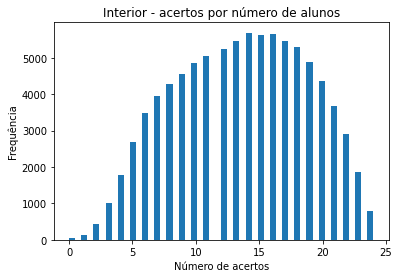

In [ ]:
plt.hist(interior['ACERTOS (Total de questões: 24)'],bins=50)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("Interior - acertos por número de alunos")

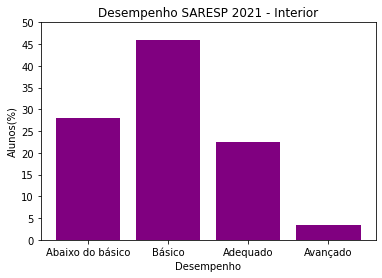

In [ ]:
# 89.234 pessoas no interior
interior[interior["STATUS"] == "Abaixo do Básico"] # 25064 pessoas (28,09%) do interior abaixo do básico

interior[interior["STATUS"] == "Básico"] #40.967 pessoas (45,91%) do interior tiveram desempenho basico

interior[interior["STATUS"] == "Adequado"] #20.109 pessoas (22,54%) do interior tiveram desempenho adequado

interior[interior["STATUS"] == "Avançado"] #3094 pessoas (3,47%) do interior tiveram desempenho avançado


alunos = [28.09,45.91,22.54,3.47] #valores de Y
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos, color="purple")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - Interior")
plt.show()

In [ ]:
#BAIXADA SANTISTA (16.462 pessoas)
presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana da Baixada Santista"].shape

#Desempenho médio:
baixada = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana da Baixada Santista"]
baixada.describe()#Desempenho médio : 54,7% de acerto , média de 13 acertos





,"REALIZOU O EXAME (S=1, N=0)",ACERTOS (Total de questões: 24),PORCENTAGEM DE ACERTOS
count,16462.0,16462.000000,16462.000000
mean,1.0,13.141599,54.756907
std,0.0,5.227286,21.780070
min,1.0,0.000000,0.000000
25%,1.0,9.000000,37.500000
50%,1.0,13.000000,54.200000
75%,1.0,17.000000,70.800000
max,1.0,24.000000,100.000000


Text(0.5, 1.0, 'Baixada santista - acertos por número de alunos')

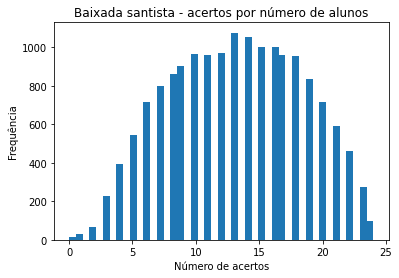

In [ ]:
plt.hist(baixada["ACERTOS (Total de questões: 24)"],bins=45)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("Baixada santista - acertos por número de alunos")

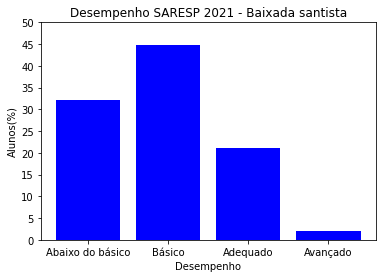

In [ ]:
#16.462 pessoas são da baixada

baixada[baixada["STATUS"] == "Abaixo do Básico"] # 5283   pessoas (32,09%) do  abaixo do básico

baixada[baixada["STATUS"] == "Básico"] # 7371 pessoas (44,78%) do  tiveram desempenho basico

baixada[baixada["STATUS"] == "Adequado"] # 3482   pessoas (21,15%) do  tiveram desempenho adequado

baixada[baixada["STATUS"] == "Avançado"] #  326 pessoas (1,98%) do  tiveram desempenho avançado



alunos = [32.09,44.78,21.15,1.98] #valores de Y
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos, color="blue")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - Baixada santista")
plt.show()


In [ ]:
#CAMPINAS: 10.991 pessoas
#desempenho médio: 58,15% de acertos, com desvio padrão 21
campinas = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de Campinas"]
campinas.describe()



,"REALIZOU O EXAME (S=1, N=0)",ACERTOS (Total de questões: 24),PORCENTAGEM DE ACERTOS
count,10991.0,10991.000000,10991.000000
mean,1.0,13.957056,58.154226
std,0.0,5.160268,21.500677
min,1.0,0.000000,0.000000
25%,1.0,10.000000,41.700000
50%,1.0,14.000000,58.300000
75%,1.0,18.000000,75.000000
max,1.0,24.000000,100.000000


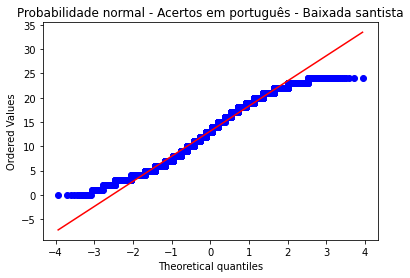

In [ ]:
scipy.stats.probplot(baixada['ACERTOS (Total de questões: 24)'],plot=plt)
plt.title("Probabilidade normal - Acertos em português - Baixada santista")
plt.show()

Text(0.5, 1.0, 'Campinas - acertos por número de alunos')

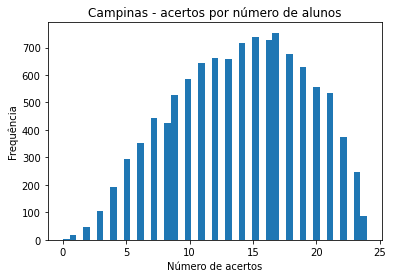

In [ ]:
plt.hist(campinas["ACERTOS (Total de questões: 24)"],bins=45)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("Campinas - acertos por número de alunos")

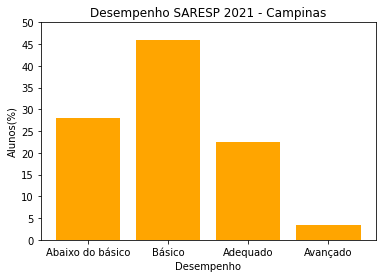

In [ ]:
campinas[campinas["STATUS"] == "Abaixo do Básico"] #2784   pessoas (25,33%) do  abaixo do básico

campinas[campinas["STATUS"] == "Básico"] # 5124 pessoas (46,62 %) de campinas tiveram desempenho basico

campinas[campinas["STATUS"] == "Adequado"] # 2705 pessoas (24,61%) de campinas tiveram desempenho adequado

campinas[campinas["STATUS"] == "Avançado"] #  378 pessoas (3,44 %) de campinas tiveram desempenho avançado


alunos_campinas = [32.09,44.78,21.15,1.98] #valores de Y
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos, color="orange")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - Campinas")
plt.show()





Text(0.5, 1.0, 'Ribeirão Preto - acertos por número de alunos')

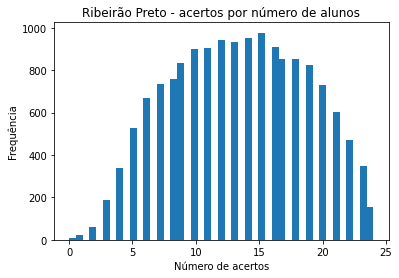

In [ ]:
#RIBEIRAO PRETO: 15.497 pessoas
ribeirao = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de Ribeirão Preto"]
ribeirao.describe() # média de 55,7%, com desvio padrão de 22%

plt.hist(ribeirao["ACERTOS (Total de questões: 24)"],bins=45)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("Ribeirão Preto - acertos por número de alunos")

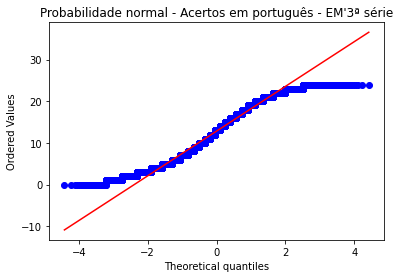

In [ ]:
scipy.stats.probplot(terceirao['ACERTOS (Total de questões: 24)'],fit=True,plot=plt)
plt.title("Probabilidade normal - Acertos em português - EM'3ª série")
plt.show()

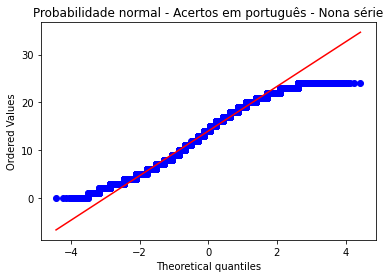

In [ ]:
scipy.stats.probplot(nono['ACERTOS (Total de questões: 24)'],fit=True,plot=plt)
plt.title("Probabilidade normal - Acertos em português - Nona série")
plt.show()

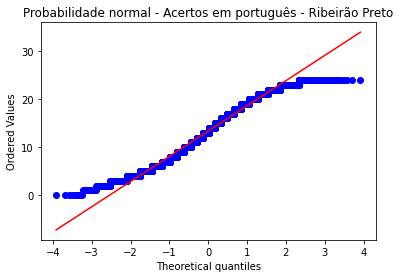

In [ ]:
scipy.stats.probplot(ribeirao['ACERTOS (Total de questões: 24)'],fit=True,plot=plt)
plt.title("Probabilidade normal - Acertos em português - Ribeirão Preto")
plt.show()

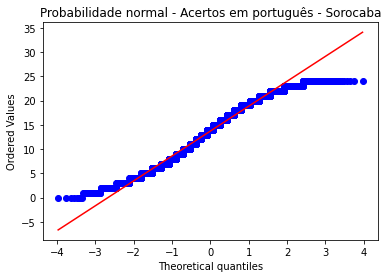

In [ ]:
scipy.stats.probplot(sorocaba['ACERTOS (Total de questões: 24)'],fit=True,plot=plt)
plt.title("Probabilidade normal - Acertos em português - Sorocaba")
plt.show()

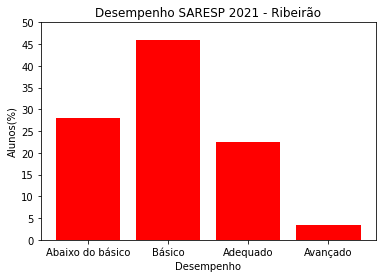

In [ ]:
ribeirao[ribeirao["STATUS"] == "Abaixo do Básico"] #4710 pessoas (30,39) de Ribeirão  abaixo do básico

ribeirao[ribeirao["STATUS"] == "Básico"] # 6841 pessoas (44,14 %) de Ribeirão tiveram desempenho basico

ribeirao[ribeirao["STATUS"] == "Adequado"] # 3379 pessoas (21,80%) de Ribeirão tiveram desempenho adequado

ribeirao[ribeirao["STATUS"] == "Avançado"] #  567 pessoas (3,66 %) de Ribeirão tiveram desempenho avançado



alunos_ribeirao = [32.09,44.78,21.15,1.98] #valores de Y
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos, color="red")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - Ribeirão")
plt.show()

Text(0.5, 1.0, 'Sorocaba - acertos por número de alunos')

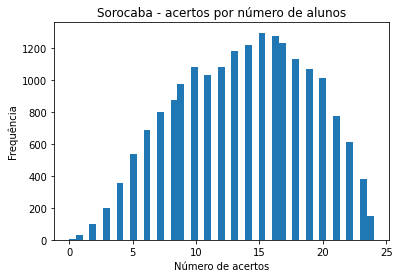

In [ ]:
#SOROCABA (19.097 pessoas)
sorocaba = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana de Sorocaba"]

sorocaba.describe() #desempenho médio de 14 acertos (57%) com desvio padrão de 21

plt.hist(sorocaba["ACERTOS (Total de questões: 24)"],bins=45)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("Sorocaba - acertos por número de alunos")

(5232, 9)
(8863, 9)
(4439, 9)
(563, 9)


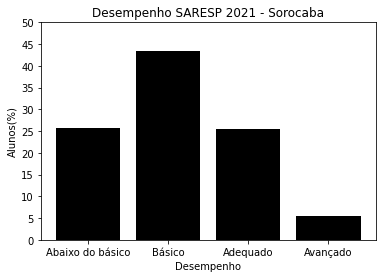

In [ ]:
print(sorocaba[sorocaba["STATUS"] == "Abaixo do Básico"].shape) #5232 pessoas (27,40%) de Sorocaba  abaixo do básico

print(sorocaba[sorocaba["STATUS"] == "Básico"].shape) # 8863 pessoas (46,41 %) de Sorocaba tiveram desempenho basico

print(sorocaba[sorocaba["STATUS"] == "Adequado"].shape) # 4439 pessoas (23,24%) de Sorocaba tiveram desempenho adequado

print(sorocaba[sorocaba["STATUS"] == "Avançado"].shape)  #563 pessoas (2,95 %) de Sorocaba tiveram desempenho avançado


alunos_sorocaba = [27.40  ,46.41  ,23.24  ,2.95] #valores de Y
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos, color="black")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - Sorocaba")
plt.show()



Text(0.5, 1.0, 'Vale do Paraíba e Litoral Norte - acertos por número de alunos')

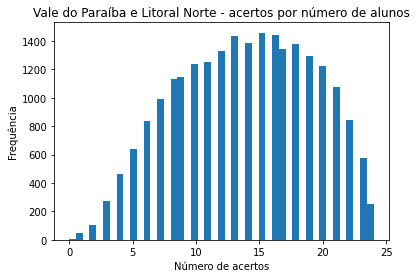

In [ ]:
# VALE DO PARAIBA (23.152 pessoas)
vale = presentes[presentes["REGIÃO METROPOLITANA DE SÃO PAULO"] == "Região Metropolitana do Vale do Paraíba e Litoral Norte"]
vale.describe() #Desempenho médio de 13 acertos (57,48%), com desvio padrão de 5 questões (22%)

plt.hist(vale["ACERTOS (Total de questões: 24)"],bins=45)
plt.xlabel("Número de acertos")
plt.ylabel("Frequência")
plt.title("Vale do Paraíba e Litoral Norte - acertos por número de alunos")

(6474, 9)
(10119, 9)
(5597, 9)
(962, 9)


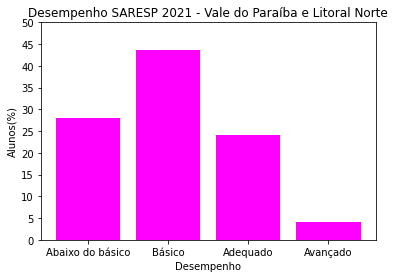

In [ ]:
print(vale[vale["STATUS"] == "Abaixo do Básico"].shape) #6474 pessoas (27,96%) tiverem desempenho abaixo do básico

print(vale[vale["STATUS"] == "Básico"].shape) # 10.119 pessoas (43,71 %) tiveram desempenho basico

print(vale[vale["STATUS"] == "Adequado"].shape) # 5597 pessoas (24,18%) tiveram desempenho adequado

print(vale[vale["STATUS"] == "Avançado"].shape)  #962 pessoas (4,16%) tiveram desempenho avançado

alunos_vale =[27.96,  43.71,  24.18,  4.16]
nivel = ['Abaixo do básico' , 'Básico','Adequado','Avançado'] #valores de x
y = [0,5,10,15,20,25,30,35,40,45,50]
plt.bar(nivel, alunos_vale, color="magenta")
plt.xticks(nivel)
plt.yticks(y)
plt.ylabel("Alunos(%)")
plt.xlabel("Desempenho")
plt.title("Desempenho SARESP 2021 - Vale do Paraíba e Litoral Norte")
plt.show()



<Figure size 720x720 with 0 Axes>

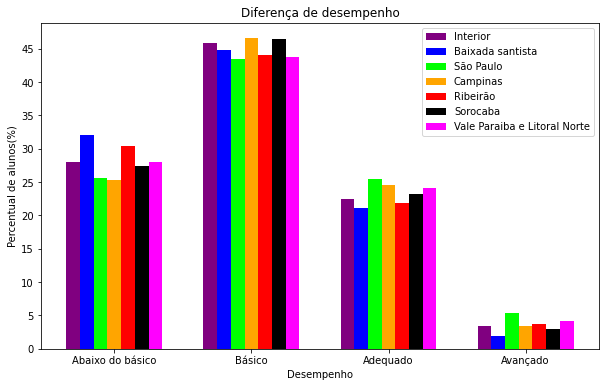

<Figure size 720x720 with 0 Axes>

In [ ]:
alunos_interior = [28.09,45.91,22.54,3.47]
alunos_baixada = [32.09,44.78,21.15,1.98]
alunos_paulista = [25.67 , 43.43 , 25.46, 5.44]
alunos_campinas = [25.3,46.6,24.6,3.4]
alunos_ribeirao = [30.39,44.14,21.80,3.66]
alunos_sorocaba = [27.40, 46.41, 23.24, 2.95]
alunos_vale =[27.96,  43.71,  24.18,  4.16]

nivel = (1,9,17,25)
nivel2 = (1.8,9.8,17.8,25.8)
nivel3 = (2.6,10.6,18.6,26.6)
nivel4 = (3.4,11.4,19.4,27.4)
nivel5 = (4.2,12.2,20.2,28.2)
nivel6 = (5,13,21,29)
nivel7 = (5.8,13.8,21.8,29.8)
media = (3.4 ,11.4 ,19.4 ,27.4 )

plt.figure(figsize=(10,6))
plt.title("Diferença de desempenho")
plt.ylabel("Percentual de alunos(%)")
plt.xlabel("Desempenho")

plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.xticks(media,('Abaixo do básico' , 'Básico','Adequado','Avançado'))


roxo = plt.bar(nivel,alunos_interior,color="purple")
azul= plt.bar(nivel2,alunos_baixada, color="blue")
preto = plt.bar(nivel3,alunos_paulista,color="lime")
amarelo = plt.bar(nivel4,alunos_campinas,color="orange")
rosa = plt.bar(nivel5,alunos_ribeirao,color="red")
ciano = plt.bar(nivel6, alunos_sorocaba,color = "black")
magenta= plt.bar(nivel7,alunos_vale,color = "magenta")
plt.legend(labels=['Interior','Baixada santista','São Paulo','Campinas','Ribeirão','Sorocaba','Vale Paraiba e Litoral Norte'])
plt.figure(figsize=(10,10))


In [ ]:
#TOP 5 DAS REGIÕES (DESEMPENHO MÉDIO):
# 1- São Paulo: aproveitamentento médio de 58,7%, em média 14 acertos
# 2- Campinas: aproveitamento médio de 58,15%, em média 13,9 acertos
# 3 -Sorocaba: aproveitamento médio de 57,1%, em média 13,7 acertos
# 4- Interior: aproveitamento médio de 56,6% , em média 13,5 acertos
# 5- Ribeirão Preto: aproveitamento médio de 55,7%, 13,4 acertos
# 6- Baixada Santista: aproveitamento médio de 54,7% , média de 13 acertos


In [ ]:
tabela["PERÍODO"]

0         NOITE
1         NOITE
2         NOITE
3         NOITE
4         MANHÃ
          ...  
457910    TARDE
457911    MANHÃ
457912    TARDE
457913    MANHÃ
457914    TARDE
Name: PERÍODO, Length: 457915, dtype: object